In [2]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import network_module as nm
import argparse

def print_csv(filename, data):
    with open(filename, 'wb') as out:
        for t in data:
            out.write('{}\t{}\n'.format(*t))


# layer_params = sys.argv[1:]

# netname = 'mnist-fc-784-'
# for width in layer_params:
#     netname += '{}-'.format(width)
# netname += '10'
reg = 0
L1 = False
L2 = False
L05 = False
netname = 'conv5-3x3-maxpool-100'
data_source = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

def loadmnist():
    import cPickle, gzip, numpy

    # Load the dataset
    f = gzip.open('./MNIST_data/mnist.pkl.gz', 'rb')
    sets = cPickle.load(f)
    f.close()
    res = []
    for set in sets:
        set[0].shape = (-1, 1, 28, 28)

        label = set[1]
        onehot = np.zeros((label.size, label.max() + 1))
        onehot[np.arange(label.size), label] = 1
        res.append((set[0].reshape(-1, 1, 28, 28), onehot))
    return res


print 'Loading MNIST images...'
train, test, _= loadmnist()


# train = (np.zeros((50, 1, 20, 20)), np.zeros((50 ,1 ,8 , 8)))
# train[0][0,:,5,5] = 0.5
# train[1][0,:,4,4] = 1

print 'Constructing network...'
#########################
# NETWORK DEFINITION
nn = nm.network(in_shape=train[0][0].shape, criterion='MSE')
nn.add_conv(10, (5, 5))
#########################
print nn

result = []


def print_test():
    print ' --- Epoch: ', 1, ' error: ',\
          nn.output.get_crit(train[0][0:16], train[1][0:16]).mean()

print 'Working with network', netname


def train_net():
    nn.SGD(train_policy=nn.fix_epoch,
           training_set=train,
           batch=128, rate=0.05, epoch_call_back=print_test, epoch=10)
    print 'Saving results to {}.res'.format(netname)
    print_csv('./results/{}.res'.format(netname), result)

    print 'Saving network snapshot to {}.net'.format(netname)
    nn.save_state('./nets/' + netname + '.net')



def loadnetwork(network_source):
    global nn
    nn = nm.load(network_source)

    
def imshow(im, cmap='Greys', interpol='None'):

    if len(im.shape) == 3:
        for i, x in enumerate(im, 1):
            plt.subplot(1, len(im), i)
            plt.imshow(x.squeeze(), cmap=cmap, interpolation=interpol)
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
    if len(im.shape) == 4:
        for irow, xrow in enumerate(im, 0):
            for icol, x in enumerate(xrow, 1):
                # print '\r  ', len(im), len(xrow), irow * len(xrow) + icol
                plt.subplot(len(im), len(xrow), irow * len(xrow) + icol)
                plt.imshow(x.squeeze(), cmap=cmap, interpolation=interpol)
                plt.gca().xaxis.set_major_locator(plt.NullLocator())
                plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.show()
    return im.shape


def visualise_layer(lay_ind=4, top=9, iterations=1000):
    test = nn.grad_ascent(lay_ind, train[0], top, iterations)\
             .reshape((top,) + nn[lay_ind].shape + (28, 28))
    test = np.concatenate((test, test.mean(axis=0)[np.newaxis, :]), axis=0)
    return test


def max_act(lay_ind, top=9):
    return test[0][nn.max_act(lay_ind, test[0], top)].squeeze()



Loading MNIST images...
Constructing network...
Network ID: 140074185607824
Network layout:
------------------------------
	INPUT  (1, 28, 28)
	   |
	   |
	  |1|
  convolution  (10, 24, 24)   ->   kernels: (1, 10, 5, 5)
	   |
	   |
	  |2|
  	OUTPUT  (10, 24, 24)   ->   CRITERION  (MSE)
------------------------------
Working with network conv5-3x3-maxpool-100


In [5]:
loadnetwork('./nets/noreg-50-50-50.net')
print nn.test_eval(test)
nn

9675


Network ID: 140074743656848
Network layout:
------------------------------
	INPUT  (1, 28, 28)
	   |
	   |
	  |1|
  shaper  (784,)
	   |
	   |
	  |2|
  fully connected  (50,)   ->   weights + bias: (50, 784) + (50,)
	   |
	   |
	  |3|
  activation (50,)   ->   type: tanh
	   |
	   |
	  |4|
  fully connected  (50,)   ->   weights + bias: (50, 50) + (50,)
	   |
	   |
	  |5|
  activation (50,)   ->   type: tanh
	   |
	   |
	  |6|
  fully connected  (50,)   ->   weights + bias: (50, 50) + (50,)
	   |
	   |
	  |7|
  activation (50,)   ->   type: tanh
	   |
	   |
	  |8|
  fully connected  (10,)   ->   weights + bias: (10, 50) + (10,)
	   |
	   |
	  |9|
  	OUTPUT  (10,)   ->   CRITERION  (softmax)
------------------------------

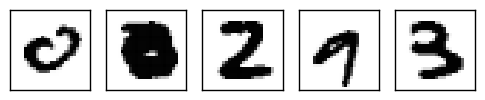

(5, 28, 28)

In [11]:
i = nn.max_act(2, train[0], 100)
i.shape 
im = train[0][i]
imshow(im.reshape(100,50,28,28)[-1,:5])

   3 5 1
   3 5 2
   3 5 3
   3 5 4
   3 5 5
   3 5 6
   3 5 7
   3 5 8
   3 5 9
   3 5 10
   3 5 11
   3 5 12
   3 5 13
   3 5 14
   3 5 15


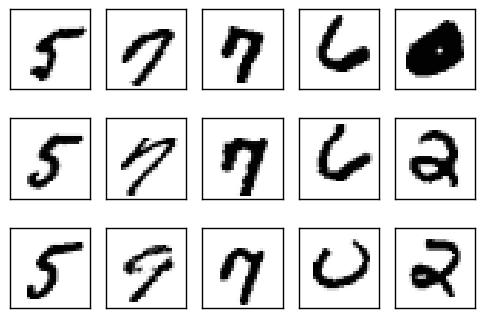

(3, 5, 28, 28)

In [30]:
i = nn.max_act(6, train[0], 50)
i.shape 
im = train[0][i]
imshow(im.reshape(3,20,28,28)[:,:5])

In [1]:
i = nn.max_act(6, train[0], 50)
i.shape 
im = train[0][i]
imshow(im.reshape(50,20,28,28)[49,:5])

NameError: name 'nn' is not defined

Starting gradient ascent:
Finding inputs with top 3 corresponding activations out of 50000 images
   4 5 1
   4 5 2
   4 5 3
   4 5 4
   4 5 5
   4 5 6
   4 5 7
   4 5 8
   4 5 9
   4 5 10
   4 5 11
   4 5 12
   4 5 13
   4 5 14
   4 5 15
   4 5 16
   4 5 17
   4 5 18
   4 5 19
   4 5 20


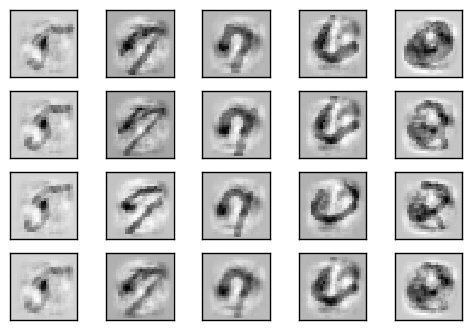

(4, 5, 28, 28)

In [36]:
im = visualise_layer(6, 3, 2000)
imshow(im[:, :5])

Starting gradient ascent:
Finding inputs with top 3 corresponding activations out of 50000 images
   4 5 1
   4 5 2
   4 5 3
   4 5 4
   4 5 5
   4 5 6
   4 5 7
   4 5 8
   4 5 9
   4 5 10
   4 5 11
   4 5 12
   4 5 13
   4 5 14
   4 5 15
   4 5 16
   4 5 17
   4 5 18
   4 5 19
   4 5 20


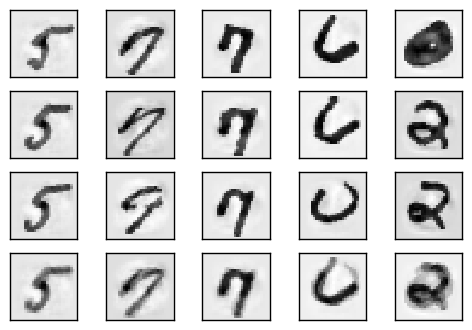

(4, 5, 28, 28)

In [39]:
im = visualise_layer(6, 3, 100)
imshow(im[:, :5])

In [19]:
im = visualise_layer(6, 20, 500)
imshow(im[:, :5])

Starting gradient ascent:
Finding inputs with top 20 corresponding activations out of 50000 images


IndexError: list index out of range

In [20]:
im = visualise_layer(2, 100, 500)

Starting gradient ascent:
Finding inputs with top 100 corresponding activations out of 50000 images


KeyboardInterrupt: 

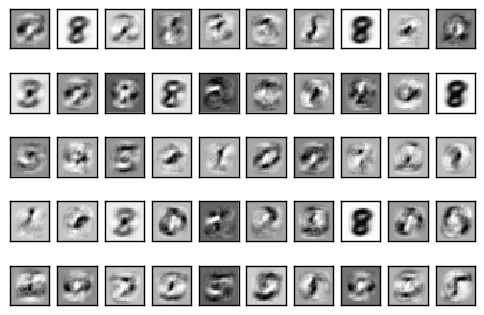

(5, 10, 28, 28)

In [21]:
imshow(im[-1].reshape(5, 10, 28, 28))

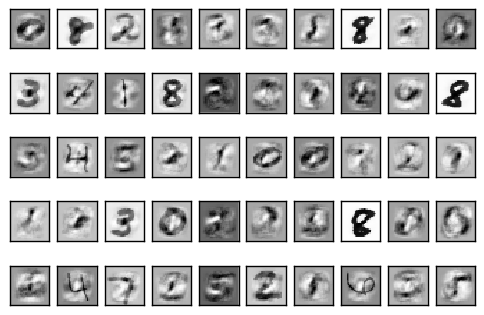

(5, 10, 28, 28)

In [22]:
imshow(im[0].reshape(5, 10, 28, 28))